# 第14章聚类方法

1.聚类是针对给定的样本，依据它们属性的相似度或距离，将其归并到若干个“类”或“簇”的数据分析问题。一个类是样本的一个子集。直观上，相似的样本聚集在同类，不相似的样本分散在不同类。

2.距离或相似度度量在聚类中起着重要作用。

常用的距离度量有闵可夫斯基距离，包括欧氏距离曼哈顿距离、切比雪夫距离、、以及马哈拉诺比斯距离。常用的相似度度量有相关系数、夹角余弦。
用距离度量相似度时，距离越小表示样本越相似；用相关系数时，相关系数越大表示样本越相似。

3.类是样本的子集，比如有如下基本定义：
用$G$表示类或簇，用$x_i$,$x_j$；等表示类中的样本，用$d_{ij}$表示样本$x_i$与样本$x_j$之间的距离。如果对任意的$x _ { i } , x _ { j } \in G$，有$$d _ { i j } \leq T$$
则称$G$为一个类或簇。

描述类的特征的指标有中心、直径、散布矩阵、协方差矩阵。

4.聚类过程中用到类与类之间的距离也称为连接类与类之间的距离包括最短距离、最长距离、中心距离、平均距离。

5.层次聚类假设类别之间存在层次结构，将样本聚到层次化的类中层次聚类又有聚合或自下而上、分裂或自上而下两种方法。

聚合聚类开始将每个样本各自分到一个类；之后将相距最近的两类合并，建立一个新的类，重复此操作直到满足停止条件；得到层次化的类别。分裂聚类开始将所有样本分到一个类；之后将已有类中相距最远的样本分到两个新的类，重复此操作直到满足停止条件；得到层次化的类别。

聚合聚类需要预先确定下面三个要素：

（1）距离或相似度；
（2）合并规则；
（3）停止条件。

根据这些概念的不同组合，就可以得到不同的聚类方法。

6.$k$均值聚类是常用的聚类算法，有以下特点。基于划分的聚类方法；类别数k事先指定；以欧氏距离平方表示样本之间的距离或相似度，以中心或样本的均值表示类别；以样本和其所属类的中心之间的距离的总和为优化的目标函数；得到的类别是平坦的、非层次化的；算法是迭代算法，不能保证得到全局最优。

$k$均值聚类算法，首先选择k个类的中心，将样本分到与中心最近的类中，得到一个聚类结果；然后计算每个类的样本的均值，作为类的新的中心；重复以上步骤，直到收敛为止。

### 层次聚类 

1. **聚合**（自下而上）：聚合法开始将每个样本各自分裂到一个类，之后将相距最近的两类合并，建立一个新的类，重复次操作知道满足停止条件，得到层次化的类别。

2. **分裂**（自上而下）： 分裂法开始将所有样本分到一个类，之后将已有类中相距最远的样本分到两个新的类，重复此操作直到满足停止条件，得到层次化的类别。


### k均值聚类

k均值聚类是基于中心的聚类方法，通过迭代，将样本分到k个类中，使得每个样本与其所属类的中心或均值最近，得到k个平坦的，非层次化的类别，构成对空间的划分。

In [4]:
import math             # 导入数学库
import random           # 随机函数
import numpy as np                      # numpy:Python中基于数组对象的科学计算库，支持大量的维度数组与矩阵运算，以及大量的数学函数库。
from sklearn import datasets,cluster    # datasets模块：自带的数据集；cluster：聚类算法模块。
import matplotlib.pyplot as plt         # 绘图函数

In [5]:
iris = datasets.load_iris()         # 加载鸢尾花数据集

In [6]:
gt = iris['target'];gt  # 获取鸢尾花数据集的标记向量并打印

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

3类

In [7]:
iris['data'][:,:2].shape    # 截取鸢尾花数据集特征向量的前两列并打印shape

(150, 2)

In [8]:
data = iris['data'][:,:2]   # 截取鸢尾花数据集特征向量的前两列作为输入向量（训练的特征向量）

In [9]:
x = data[:,0]       # 取特征向量的第一列
y = data[:,1]       # 取特征向量的第二列

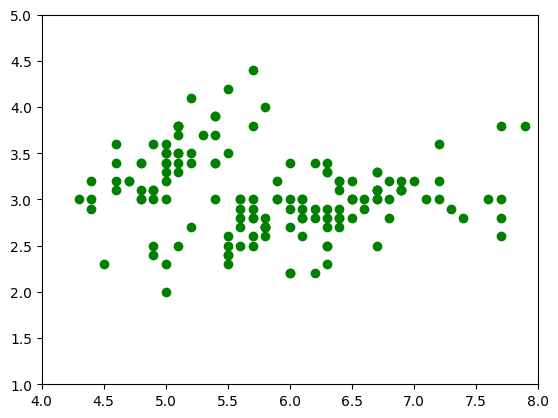

In [10]:
plt.scatter(x, y, color='green')    # 绘制x,y
plt.xlim(4, 8)      # 设定x坐标轴的范围
plt.ylim(1, 5)      # 设定y坐标轴的范围
plt.show()          # 显示图形

In [11]:
# 定义聚类数的节点

class ClusterNode:
    def __init__(self, vec, left=None, right=None, distance=-1, id=None, count=1):
        """
        :param vec: 保存两个数据聚类后形成新的中心
        :param left: 左节点
        :param right:  右节点
        :param distance: 两个节点的距离
        :param id: 用来标记哪些节点是计算过的
        :param count: 这个节点的叶子节点个数
        """
        self.vec = vec
        self.left = left
        self.right = right
        self.distance = distance
        self.id = id
        self.count = count

In [12]:
def euler_distance(point1: np.ndarray, point2: list) -> float:  # 要求point1为np.ndarray类型 point2为list类型 并限定了其中保存的数据类型为float
    """
    计算两点之间的欧拉距离，支持多维
    """
    distance = 0.0                      # 初始化保存距离
    for a, b in zip(point1, point2):    # 组合输入变量并迭代
        distance += math.pow(a - b, 2)  # distance +=（a-b)^2
    return math.sqrt(distance)  # 返回欧氏距离

In [13]:
# 层次聚类（聚合法）

# 假设有 n 个待聚类的样本，对于层次聚类算法，它的步骤是：
# 步骤一：（初始化）将每个样本都视为一个聚类；
# 步骤二：计算各个聚类之间的相似度；
# 步骤三：寻找最近的两个聚类，将他们归为一类；
# 步骤四：重复步骤二，步骤三；直到所有样本归为一类。
# 整个过程就是建立一棵树，在建立的过程中，可以在步骤四设置所需分类的类别个数，作为迭代的终止条件，毕竟都归为一类并不实际。

class Hierarchical:             # 层次聚类
    def __init__(self, k):
        self.k = k              # k值,所需分类的类别个数
        self.labels = None
        
    def fit(self, x):           # 训练
        nodes = [ClusterNode(vec=v, id=i) for i, v in enumerate(x)]     # 数据处理--创建聚类节点列表 为输入数据中的每个点创建一个聚类节点
        distances = {}          # 点之间的距离字典
        point_num, feature_num = x.shape    # 特征的维度
        self.labels = [-1] * point_num      # 
        currentclustid = -1                 # 用来更新剧烈聚类节点的id
        while(len(nodes)) > self.k:     # 迭代直到所需分类的类别个数
            min_dist = math.inf         # math.inf 常量无穷大
            nodes_len = len(nodes)      # 层次聚类的节点数
            closest_part = None         # 标识最相似的两个聚类
            # 迭代 只需计算节点i和其之后的距离即可，相当于距离矩阵的上三角
            for i in range(nodes_len - 1):
                for j in range(i+1, nodes_len):
                    # 为了不重复计算距离，保存在字典中
                    d_key = (nodes[i].id, nodes[j].id)          # 组织距离字典中的key
                    if d_key not in distances:                  # 如果两点之间的距离未计算过
                        distances[d_key] = euler_distance(nodes[i].vec, nodes[j].vec)   # 计算两点之间的欧氏距离并保存到距离字典中
                    d = distances[d_key]    # 取得两点之间的距离
                    if d < min_dist:        # 如果该距离小于标记的最小距离
                        min_dist = d            # 更新最小距离
                        closest_part = (i, j)   # 更新最相似的两个聚类
                        
            part1, part2 = closest_part         # 取出本轮迭代最相似的两个聚类的序号
            node1, node2 = nodes[part1], nodes[part2]   # 取出本轮迭代最相似的两个聚类的层次聚类节点
            new_vec = [ (node1.vec[i] * node1.count + node2.vec[i] * node2.count ) / (node1.count + node2.count)    # 取平均值作为新节点的位置
                        for i in range(feature_num)]
            new_node = ClusterNode(vec=new_vec,         # 新建新的聚类节点 位置为聚类后点的平均值
                                   left=node1,          
                                   right=node2,
                                   distance=min_dist,   # 聚类成该聚类节点的距离
                                   id=currentclustid,   # 聚类后节点的序号--用来标记哪些节点是计算过的（计算过的未负值）
                                   count=node1.count + node2.count) # 这个节点的叶子节点个数
            currentclustid -= 1     # 更新id
            del nodes[part2], nodes[part1]  # 删除被聚类过的节点        # 一定要先del索引较大的
            nodes.append(new_node)          # 将聚类的新节点添加到聚类节点列表中
            
        self.nodes = nodes      # 保存聚类节点
        self.calc_label()       # 调取聚类的结果
        
    def calc_label(self):
        """
        调取聚类的结果
        """
        for i, node in enumerate(self.nodes):
            # 将节点的所有叶子节点都分类
            self.leaf_traversal(node, i)    # 递归遍历叶子节点

    def leaf_traversal(self, node: ClusterNode, label):
        """
        递归遍历叶子节点
        """
        if node.left == None and node.right == None:    # 叶节点
            self.labels[node.id] = label                # 对类别进行标记（所有原始的节点，id为正值且和输入数据相匹配）
        if node.left:
            self.leaf_traversal(node.left, label)       # 递归遍历左节点
        if node.right:
            self.leaf_traversal(node.right, label)      # 递归遍历右节点
            
# https://zhuanlan.zhihu.com/p/32438294

In [15]:
my = Hierarchical(3)    # 实例化层次聚类，并期望聚类个数为3
my.fit(data)        # 进行聚类
labels = np.array(my.labels)    # 将聚类后的类别转化为array
print(labels)       # 打印类别

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 1 0 0 1 2 1 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


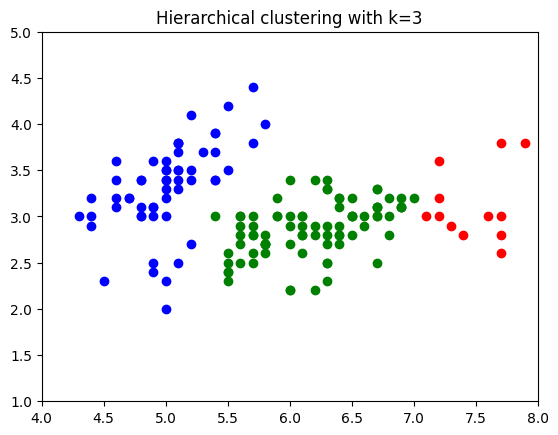

In [17]:
# visualize result

cat1 = data[np.where(labels==0)]    # # 获得所有标记为0的点（特征向量）
cat2 = data[np.where(labels==1)]    # 获得所有标记为1的点
cat3 = data[np.where(labels==2)]    # 获得所有标记为2的点

plt.scatter(cat1[:,0], cat1[:,1], color='green')    # 绘制所有标记为0的点
plt.scatter(cat2[:,0], cat2[:,1], color='red')      # 绘制所有标记为1的点
plt.scatter(cat3[:,0], cat3[:,1], color='blue')     # 绘制所有标记为2的点
plt.title('Hierarchical clustering with k=3')       # 设置标题
plt.xlim(4, 8)  # 设置x轴的范围
plt.ylim(1, 5)  # 设置y轴的范围
plt.show()  # 显示图形

In [23]:
sk = cluster.AgglomerativeClustering(3)     # 调用sklearn库中的层次聚类算法
sk.fit(data)    # 训练
labels_ = sk.labels_        # 获取聚类标记
print(labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 1 0 1 1 0 2 0 2 0 2 2 2 2 0 0 2 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 1 2 2 2 0 1 2 0 2 0 0 0 0 1 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0]


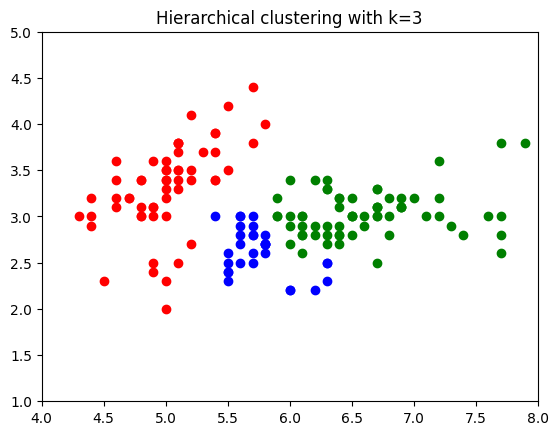

In [24]:
# visualize result of sklearn

cat1_ = data[np.where(labels_==0)]
cat2_ = data[np.where(labels_==1)]
cat3_ = data[np.where(labels_==2)]

plt.scatter(cat1_[:,0], cat1_[:,1], color='green')
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')
plt.title('Hierarchical clustering with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

---------------------------------------------------------------------------------------------------------------------------------

In [25]:
# kmeans

class MyKmeans:
    def __init__(self, k, n=20):
        self.k = k      # 需要聚类的个数
        self.n = n      # 训练迭代次数
        
    def fit(self, x, centers=None):
        # 第一步，随机选择 K 个点, 或者指定
        if centers is None:
            idx = np.random.randint(low=0, high=len(x), size=self.k)    # 返回范围0-len(x)内的k个随机整数。 size:输出随机数的尺寸，比如size = (m * n* k)则输出同规模即m * n* k个随机数。默认是None的，仅仅返回满足要求的单一随机数。
            centers = x[idx]    # 以选定的随机数序列挑选聚类的初始点
        #print(centers)
        
        inters = 0
        while inters < self.n:
            #print(inters)
            #print(centers)
            points_set = {key: [] for key in range(self.k)} # 使用字典保存k个聚类类别

            # 第二步，遍历所有点 P，将 P 放入最近的聚类中心的集合中
            for p in x:
                # np.argmin()求最小值对应的索引
                # np.sum(, axis=1) 行求和 
                # (centers - p) ** 2 计算欧氏距离
                nearest_index = np.argmin(np.sum((centers - p) ** 2, axis=1) ** 0.5)    # 返回离p点最近的聚类中心的序号
                points_set[nearest_index].append(p)     # 在该聚类类别中添加p点

            # 第三步，遍历每一个点集，计算新的聚类中心
            for i_k in range(self.k):       # 迭代k个聚类类别
                centers[i_k] = sum(points_set[i_k])/len(points_set[i_k])    # 更新聚类中心坐标
                
            inters += 1 # 迭代次数+1

        
            
        return points_set, centers  # 返回聚类数据 和 每个聚类的中心坐标
        

In [26]:
m = MyKmeans(3)         # 实例化k-means
points_set, centers = m.fit(data)   # 训练

In [27]:
centers # 打印中心点位置

array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

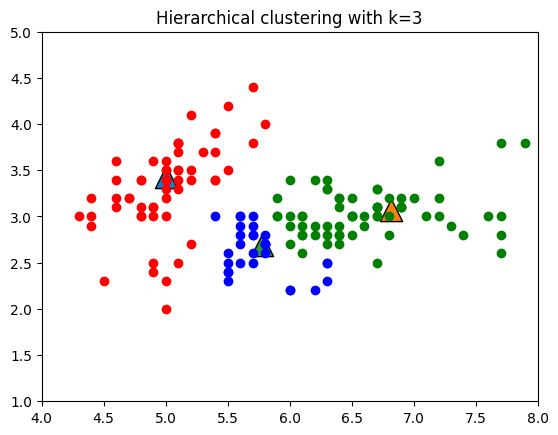

In [33]:
# visualize result

cat1 = np.asarray(points_set[0])        # 获得所有标记为0的点（特征向量）
cat2 = np.asarray(points_set[1])        # 获得所有标记为1的点
cat3 = np.asarray(points_set[2])        # 获得所有标记为2的点

for ix, p in enumerate(centers):
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=256)   # 绘制聚类的中心点
        
plt.scatter(cat1_[:,0], cat1_[:,1], color='green')  # 绘制所有标记为0的点
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')    # 绘制所有标记为1的点
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')   # 绘制所有标记为2的点
plt.title('Hierarchical clustering with k=3')    # 设置标题
plt.xlim(4, 8)  # 设置x轴的范围
plt.ylim(1, 5)  # 设置y轴的范围
plt.show()      # 显示图形

In [29]:
# using sklearn
from sklearn.cluster import KMeans  # 导入sklearn的KMeans类
kmeans = KMeans(n_clusters=3, max_iter=100).fit(data)   # 实例化并进行训练
gt_labels__ = kmeans.labels_            # 获得分类数据
centers__ = kmeans.cluster_centers_     # 过的中心店坐标

In [30]:
gt_labels__         # 打印分类数据

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [31]:
centers__   # 打印中心店坐标

array([[6.81276596, 3.07446809],
       [5.77358491, 2.69245283],
       [5.006     , 3.428     ]])

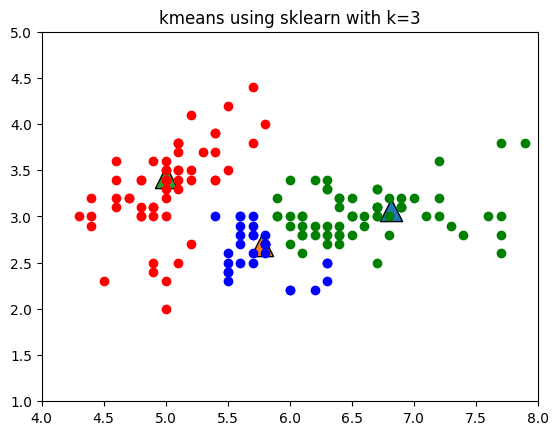

In [34]:
# visualize result

cat1 = data[gt_labels__ == 0]
cat2 = data[gt_labels__ == 1]
cat3 = data[gt_labels__ == 2]

for ix, p in enumerate(centers__):
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=256)
        
plt.scatter(cat1_[:,0], cat1_[:,1], color='green')
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')
plt.title('kmeans using sklearn with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

#### 寻找 K 值

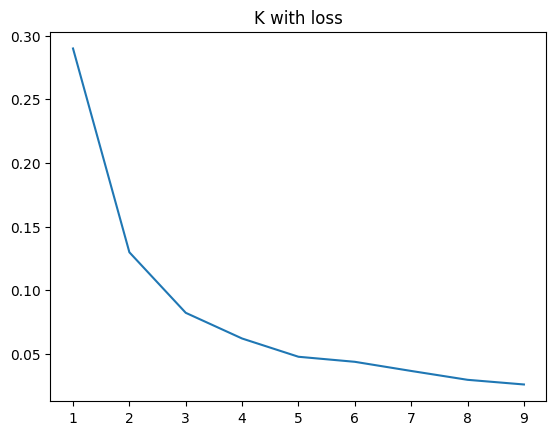

In [35]:
from sklearn.cluster import KMeans

loss = []

for i in range(1, 10):      # 迭代从1到9作为k值进行kmeans中k值进行训练
    kmeans = KMeans(n_clusters=i, max_iter=100).fit(data)       # KMeans模型训练 聚类类别个数为i
    loss.append(kmeans.inertia_ / len(data) / 3)        # 计算损失并保存

plt.title('K with loss')
plt.plot(range(1, 10), loss)
plt.show()

##### 例 14.2

In [36]:
X = [[0, 2], [0, 0], [1, 0], [5, 0], [5, 2]]

In [37]:
np.asarray(X)

array([[0, 2],
       [0, 0],
       [1, 0],
       [5, 0],
       [5, 2]])

In [31]:
m = MyKmeans(2, 100)
points_set, centers = m.fit(np.asarray(X))

In [32]:
points_set

{0: [array([0, 2]), array([0, 0]), array([1, 0])],
 1: [array([5, 0]), array([5, 2])]}

In [33]:
centers

array([[0, 0],
       [5, 1]])

In [34]:
kmeans = KMeans(n_clusters=2, max_iter=100).fit(np.asarray(X))

In [35]:
kmeans.labels_

array([0, 0, 0, 1, 1])

In [36]:
kmeans.cluster_centers_

array([[0.33333333, 0.66666667],
       [5.        , 1.        ]])

----
本章代码来源：https://github.com/hktxt/Learn-Statistical-Learning-Method

本文代码更新地址：https://github.com/fengdu78/lihang-code

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)